<a href="https://colab.research.google.com/github/SamiaNoor/ceri8211globalgeophysics/blob/master/SamiaHW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [0]:
pip uninstall shapely

Uninstalling Shapely-1.7.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Shapely-1.7.0-py3.6.egg-info
    /usr/local/lib/python3.6/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.0


In [0]:
pip install --no-binary :all: shapely

  Using cached https://files.pythonhosted.org/packages/44/ec/4eddbf9d17a917c51fb4ad159aa7137f506681e91ab559cf87d120e1d78d/Shapely-1.7.0.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [0]:
import math
class pointlocation:
  def __init__(self,name):
    self.loc=name
    self.lamda=[]
    self.phi=[]
  def add_lamda(self,lamda):
    self.lamda.append(lamda)
  def add_phi(self,phi):
    self.phi.append(phi)
    

EAlut=pointlocation('E. Aleutian')
WAlut=pointlocation('W. Alutian')
SanAn=pointlocation('San Andeas')
GCal=pointlocation('Gulf of California')
EPac=pointlocation('East Pacific Rise')
APac=pointlocation('Antarctic-Pacific Ridge')

EAlut.add_lamda(52)
EAlut.add_phi(-169)
WAlut.add_lamda(54)
WAlut.add_phi(169)
SanAn.add_lamda(38)
SanAn.add_phi(-122)
GCal.add_lamda(26)
GCal.add_phi(-110)
EPac.add_lamda(-13)
EPac.add_phi(-112)
APac.add_lamda(-59)
APac.add_phi(-150)

In [0]:
class polelocation:
  def __init__(self,name):
    self.loc=name
    self.lamda=[]
    self.phi=[]
    self.omega=[]
  def add_lamda(self,lamda):
    self.lamda.append(lamda)
  def add_phi(self,phi):
    self.phi.append(phi)
  def add_omega(self,omega):
    self.omega.append(omega)

NamPac=polelocation('N.America-Pacific')
NazPac=polelocation('Nazca-Pacific')
PacAnt=polelocation('Pacific-Antertica')
NamPac.add_lamda(48.7)
NamPac.add_phi(-78.2)
NamPac.add_omega(7.5*math.pow(10,-7))
NazPac.add_lamda(55.6)
NazPac.add_phi(-90.1)
NazPac.add_omega(13.6*math.pow(10,-7))
PacAnt.add_lamda(-64.3)
PacAnt.add_phi(-96)
PacAnt.add_omega(8.7*math.pow(10,-7))



In [0]:
import numpy as np
def relatmotion(lamdaX,phiX,lamdaP,phiP,omega):
  lamdaX=np.deg2rad(lamdaX)
  lamdaP=np.deg2rad(lamdaP)
  phiX=np.deg2rad(phiX)
  phiP=np.deg2rad(phiP)
  omega=np.deg2rad(omega)
  R=6371*math.pow(10,5)

  a=math.acos(math.sin(lamdaX)*math.sin(lamdaP)+math.cos(lamdaX)*math.cos(lamdaP)*math.cos(phiP-phiX))
  C=math.asin((math.cos(lamdaP)*math.sin(phiP-phiX)/(math.sin(a))))
  v=omega*R*math.sin(a)
  beta=90+C*180/np.pi
  return v,beta
d1,azim1=relatmotion(EAlut.lamda,EAlut.phi,NamPac.lamda,NamPac.phi,NamPac.omega)
d2,azim2=relatmotion(WAlut.lamda,WAlut.phi,NamPac.lamda,NamPac.phi,NamPac.omega)
d3,azim3=relatmotion(SanAn.lamda,SanAn.phi,NamPac.lamda,NamPac.phi,NamPac.omega)
d4,azim4=relatmotion(GCal.lamda,GCal.phi,NamPac.lamda,NamPac.phi,NamPac.omega)
d5,azim5=relatmotion(EPac.lamda,EPac.phi,NazPac.lamda,NazPac.phi,NazPac.omega)
d6,azim6=relatmotion(APac.lamda,APac.phi,PacAnt.lamda,NazPac.phi,PacAnt.omega)


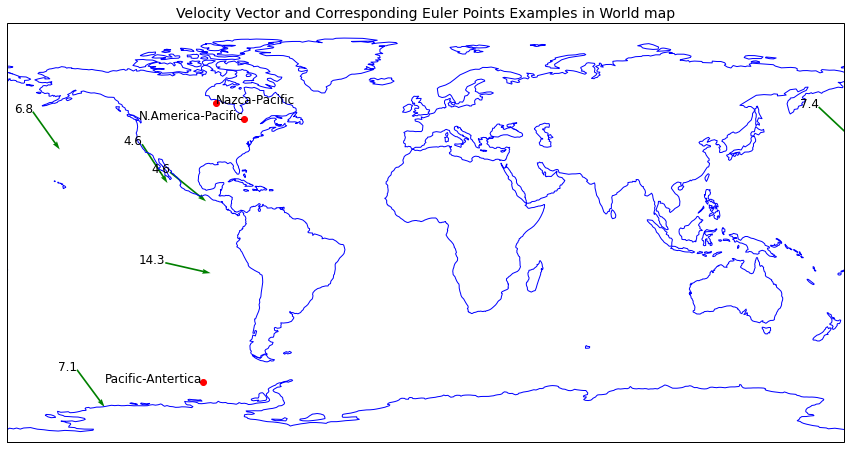

In [0]:
import matplotlib.pyplot as plt
# you need this for cartographic plot

import cartopy.crs as ccrs
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(right=0.9, bottom=0.1)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='blue')
ax.set_global()


Eulerpoints=ax.plot([NamPac.phi], [NamPac.lamda],\
            transform=ccrs.PlateCarree(),color='red', linewidth=2, marker='o')
ax.plot([NazPac.phi], [NazPac.lamda],\
            transform=ccrs.PlateCarree(),color='red', linewidth=2, marker='o')
ax.plot([PacAnt.phi], [PacAnt.lamda],\
            transform=ccrs.PlateCarree(),color='red', linewidth=2, marker='o')

Eulerpointslabel=ax.text(-78.2, 48.7, NamPac.loc, horizontalalignment='right',
         fontsize=12,transform=ccrs.PlateCarree())
ax.text(-90.1, 55.6, NazPac.loc, horizontalalignment='left',
         fontsize=12,transform=ccrs.PlateCarree())
ax.text(-96, -64.3, PacAnt.loc, horizontalalignment='right',
         fontsize=12,transform=ccrs.PlateCarree())

velocity=ax.quiver(EAlut.phi,EAlut.lamda,d1*np.sin(azim1*np.pi/180),\
                   d1*np.cos(azim1*np.pi/180),color='green',width=0.002,transform=ccrs.PlateCarree())
ax.quiver(WAlut.phi,WAlut.lamda,d2*np.sin(azim2*np.pi/180),\
                   d2*np.cos(azim2*np.pi/180),color='green',width=0.002,transform=ccrs.PlateCarree())
ax.quiver(SanAn.phi,SanAn.lamda,d3*np.sin(azim3*np.pi/180),\
                   d3*np.cos(azim3*np.pi/180),color='green',width=0.002,transform=ccrs.PlateCarree())
ax.quiver(GCal.phi,GCal.lamda,d4*np.sin(azim4*np.pi/180),\
                   d4*np.cos(azim4*np.pi/180),color='green',width=0.002,transform=ccrs.PlateCarree())
ax.quiver(EPac.phi,EPac.lamda,d5*np.sin(azim5*np.pi/180),\
                   d5*np.cos(azim5*np.pi/180),color='green',width=0.002,transform=ccrs.PlateCarree())
ax.quiver(APac.phi,APac.lamda,d6*np.sin(azim6*np.pi/180),\
                   d6*np.cos(azim6*np.pi/180),color='green',width=0.002,transform=ccrs.PlateCarree())
ax.set_title('Velocity Vector and Corresponding Euler Points Examples in World map', fontsize=14)

Velocitymagnitude=ax.text(-169, 52, '6.8', horizontalalignment='right',fontsize=12,
         transform=ccrs.PlateCarree())
ax.text(-122, 38, '4.6', horizontalalignment='right',fontsize=12,
         transform=ccrs.PlateCarree())
ax.text(169,54, '7.4', horizontalalignment='right',fontsize=12,
         transform=ccrs.PlateCarree())
ax.text(-110,26, '4.6', horizontalalignment='right',fontsize=12,
         transform=ccrs.PlateCarree())
ax.text(-112,-13,'14.3', horizontalalignment='right',fontsize=12,
         transform=ccrs.PlateCarree())
ax.text(-150,-59, '7.1', horizontalalignment='right',fontsize=12,
         transform=ccrs.PlateCarree())
plt.show()
